In [1683]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_excel("Data_for_NN.xlsx",header=2) 

df.head() 

,Target,Time,Call_centre_lvl,Age,First_contract,Gender,Problem,Region,Emotionality
0,0,2020-02-20 17:19:45.312983,0.396821,0.769557,Более 5 лет,Ж,2,7,0.225755
1,0,2020-02-18 19:53:29.366494,0.396821,0.754719,Более 5 лет,Ж,2,9,0.214754
2,0,2020-02-21 20:58:30.872922,0.396821,0.757050,Более 5 лет,Ж,2,9,0.212734
3,0,2020-02-16 21:43:51.866005,0.396821,0.752471,Более 5 лет,Ж,2,9,0.205210
4,0,2020-02-13 20:15:36.013792,0.396821,0.760621,Более 5 лет,Ж,2,9,0.207274


In [1622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6839 entries, 0 to 6838
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Target           6839 non-null   int64         
 1   Time             6839 non-null   datetime64[ns]
 2   Call_centre_lvl  6839 non-null   float64       
 3   Age              6839 non-null   float64       
 4   First_contract   6839 non-null   object        
 5   Gender           6839 non-null   object        
 6   Problem          6839 non-null   int64         
 7   Region           6839 non-null   int64         
 8   Emotionality     6839 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 481.0+ KB


In [1623]:
df.nunique()

Target                2
Time               6839
Call_centre_lvl      43
Age                6758
First_contract        3
Gender                2
Problem              11
Region               52
Emotionality       4817
dtype: int64

In [1624]:
feature_names = df.columns.tolist() 
for column in feature_names: 
    print (column )
    print (df[column].value_counts(dropna=False) )

Target
1    3506
0    3333
Name: Target, dtype: int64
Time
2020-03-04 19:17:37.540651    1
2021-01-10 22:14:57.877841    1
2020-02-29 01:28:44.467599    1
2021-01-19 13:02:31.519830    1
2020-02-20 05:46:55.832148    1
                             ..
2020-04-18 20:15:36.911869    1
2020-09-30 03:44:49.426083    1
2021-01-13 03:44:42.109748    1
2020-03-04 19:16:40.621843    1
2021-01-22 12:35:45.813707    1
Name: Time, Length: 6839, dtype: int64
Call_centre_lvl
0.468328    1323
0.637132    1141
0.551554     387
0.360371     383
0.000000     379
0.882630     280
0.393699     194
0.618018     163
0.798588     158
0.118763     158
0.366278     157
0.693512     155
0.601883     153
0.237814     150
0.448158     133
0.590645     120
0.730010     112
0.644720     112
0.493541      96
0.396821      96
0.522451      95
0.694184      85
0.437545      84
1.000000      69
0.548624      59
0.306056      49
0.323344      49
0.201556      48
0.337079      48
0.572732      46
0.621812      43
0.79993

In [1625]:
def hour(data):
    '''Извлекает час из datetime'''
    
    return(data.timetuple()[3])

def day_part(data):
    '''0 - Утро, 1 - День, 2 - Вечер, 3 - Ночь'''
    k=0
    h=data.timetuple()[3]
    if h>=3 and h <=8:
        k=0
    elif h>8 and h <=16:
        k=1
    elif h> 16 and h <=23:
        k=2
    else:
        k=3
    return k

# распределение количества положительных и отрицательных исходов в зависимости от часа 

filter = df['Target']==1
ts1['time'] =pd.DataFrame( df.where(filter).dropna()['Time'].apply(hour))

filter = df['Target']==0
ts0['time'] =pd.DataFrame( df.where(filter).dropna()['Time'].apply(hour))

count1 = ts1['time'].value_counts().sort_index()
count0 = ts0['time'].value_counts().sort_index()

freq = pd.DataFrame({'hours':count1.index, 'amount1':count1.values, 'amount0':count0.values, 'p':count1.values/(count1.values+count0.values) })
p=freq['p']


def hour_class(data):
    '''Возвращает 0 если отрицательных исходов больше чем положительных, 1 в противном случае и 2 если поровну'''
    global p
    k=0
    h=data.timetuple()[3]
    if p[h]>0.5:
        k=1
    elif p[h]<0.5:
        k=0
    else:
        k=2
    return k

freq = freq.sort_values('p')
freq['rang']=1-np.array(range(1,25))/24
def p_class(data):
    '''Возвращает ранг нормированный по максимуму'''
    global freq
    
    h=data.timetuple()[3]

    return freq['rang'][h]
print(freq['rang'][17])

0.7916666666666666


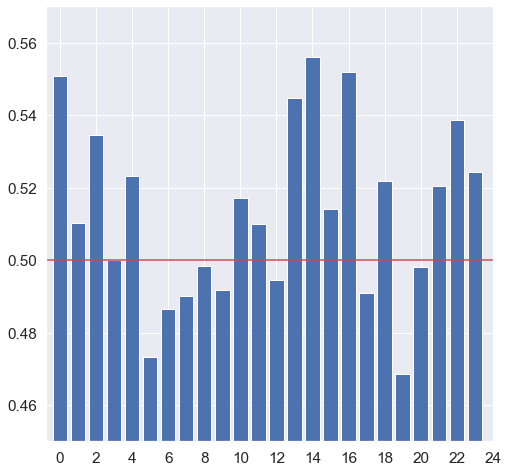

In [1626]:
plt.figure(figsize=(8, 8))
plt.bar(freq['hours'],freq['p']);
plt.plot(range(-1,25),[0.5]*26,color = 'r')
plt.axis([-0.75,23.75,0.45,0.57]);
plt.xticks(range(0,25,2));

In [1627]:
def year_month(data):
    '''Извлекает год и месяц из datetime'''
    tt = data.timetuple()
    d = datetime.date(tt[0], tt[1], 1)
    return d

def weekend(data):
    '''0 - Выходной, 1 - Будни'''
    wd = data.weekday()
    if wd == 5 or wd == 6:
        k=0
    else:
        k=1
    return k

def week_day(data):
    '''Возвращает день недели'''
    wd = data.weekday()
    return wd

def week_day_class(data):
    '''Возвращает 0 если отрицательных исходов больше чем положительных, и 1 в противном случае'''
    k=0
    wd = data.weekday()
    if wd == 3 or wd == 4:
        k=0
    else:
        k=1
    return(k)

# распределение количества положительных и отрицательных исходов в зависимости от дня недели (0 - ПН, 6 - ВС)

filter = df['Target']==1
ts1['week_day'] =pd.DataFrame( df.where(filter).dropna()['Time'].apply(week_day))

filter = df['Target']==0
ts0['week_day'] =pd.DataFrame( df.where(filter).dropna()['Time'].apply(week_day))


count1 = ts1['week_day'].value_counts().sort_index()
count0 = ts0['week_day'].value_counts().sort_index()

freq = pd.DataFrame({'week_day':count1.index, 'amount1':count1.values, 'amount0':count0.values, 'p':count1.values/(count0.values+count1.values)})

freq = freq.sort_values('p')
freq['rang']=np.array(range(1,8))/7

def week_day_rang(data):
    '''Возвращает ранг нормированный по максимуму'''
    global freq
    
    
    return freq['rang'][data.weekday()]
freq

,week_day,amount1,amount0,p,rang
3,3,460,497,0.480669,0.142857
4,4,479,490,0.494324,0.285714
5,5,528,508,0.509653,0.428571
1,1,533,499,0.516473,0.571429
2,2,479,447,0.517279,0.714286
6,6,528,479,0.524330,0.857143
0,0,499,413,0.547149,1.000000


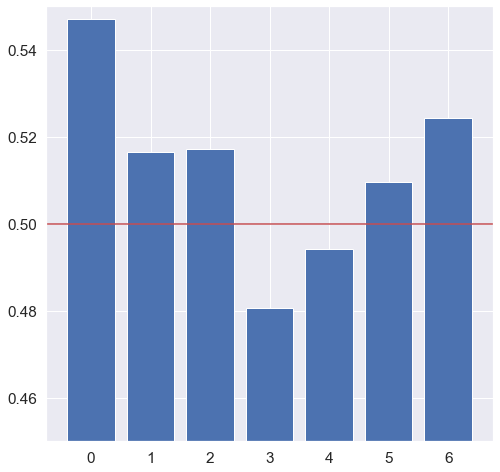

In [1628]:
plt.figure(figsize=(8, 8))
plt.bar(freq['week_day'],freq['p']);
plt.plot(range(-1,8),[0.5]*9,color = 'r')
plt.axis([-0.75,6.75,0.45,0.55]);
plt.xticks(range(0,7));

In [1564]:
df.columns

Index(['Target', 'Time', 'Call_centre_lvl', 'Age', 'First_contract', 'Gender',
       'Problem', 'Region', 'Emotionality'],
      dtype='object')

In [1568]:
col=[ 'Time', 'Call_centre_lvl', 'Age', 'First_contract', 'Gender',
       'Problem', 'Region', 'Emotionality']

X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]
Y=df['Target']
X['Time'] = pd.DataFrame( df['Time'].apply(p_class))
col.append('Week_day')
X['Week_day'] = pd.DataFrame( df['Time'].apply(week_day_rang))
X.head() 

,Time,Call_centre_lvl,Age,First_contract,Gender,Problem,Region,Emotionality,Week_day
0,0.791667,0.396821,0.769557,0,0,2.0,7.0,0.225755,0.583333
1,0.958333,0.396821,0.754719,0,0,2.0,9.0,0.214754,0.500000
2,0.666667,0.396821,0.757050,0,0,2.0,9.0,0.212734,0.291667
3,0.375000,0.396821,0.752471,0,0,2.0,9.0,0.205210,0.875000
4,0.666667,0.396821,0.760621,0,0,2.0,9.0,0.207274,0.583333


In [1569]:
X.nunique()

Time                 24
Call_centre_lvl      43
Age                6758
First_contract        3
Gender                2
Problem              11
Region               52
Emotionality       4817
Week_day              7
dtype: int64

In [1629]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=38)

In [1678]:
model = RandomForestClassifier(n_estimators=259)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=259)

In [1679]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for idx in indices:
    
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.2414, 'Age'],
 [0.2013, 'Call_centre_lvl'],
 [0.1595, 'Region'],
 [0.142, 'Emotionality'],
 [0.0994, 'Time'],
 [0.0617, 'Week_day'],
 [0.0558, 'Problem'],
 [0.0282, 'Gender'],
 [0.0107, 'First_contract']]

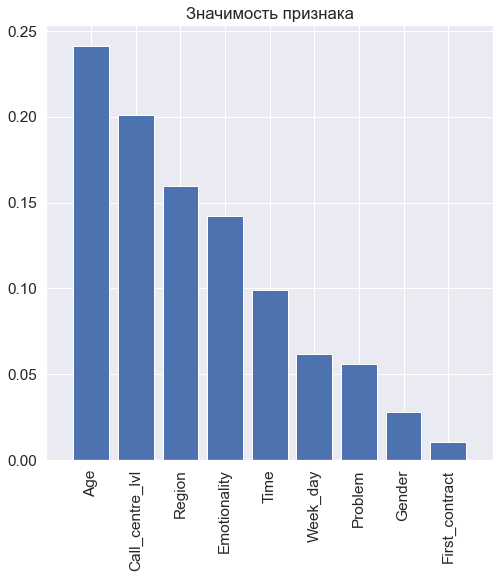

In [1680]:
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [1681]:
pred = model.predict(X_test)
r2_score(pred, y_test)


0.3523837269081811

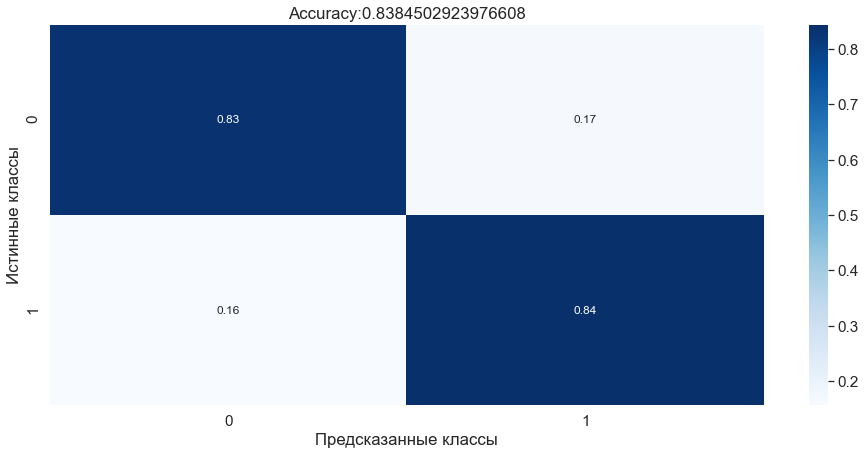

In [1682]:
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))

sns.heatmap(matrix,annot=True, annot_kws={'size':12},  cmap=plt.cm.Blues)

class_names = ['0', '1']                 
plt.title("Accuracy:"+ str(accuracy_score(y_test,pred)))
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы');

150 -- 0.841374269005848
159 -- 0.841374269005848
171 -- 0.8406432748538012
184 -- 0.8406432748538012


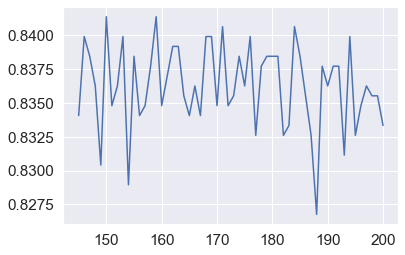

In [1642]:
# x=[]
# y=[]
# k=0
# for i in range(10,301,1):
#     model = RandomForestClassifier(n_estimators=i)
#     model.fit(X_train, y_train)
#     x.append(i)
#     y.append(accuracy_score(y_test, model.predict(X_test)))
#     if y[k]>=0.84:
#         print(i,'--',y[k])
#     k+=1
# plt.plot(x,y)



# 238 -- 0.8442982456140351

# 259 -- 0.8442982456140351

# 204 -- 0.8455165692007798
# 216 -- 0.8455165692007798
